In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil import parser

In [3]:
# Nombramiento de columnas
col_names = ['target', # Polaridad del twet 0=negativo, 2=neutral, 4=positivo
             'ids',    # ID tweet
             'date',   # Fecha y hora del tweet
             'flag',   # QUERY
             'user',   # Usuario del tweet
             'text']   # Texto del tweet

- Variables:
        - 

In [3]:
df = pd.read_csv('../datos/trainingandtestdata/training_1600000_processed_noemoticon.csv',
                 encoding='latin-1', names=col_names)

In [4]:
df2 = pd.read_csv('../datos/trainingandtestdata/testdata_manual_2009_06_14.csv', names=col_names)

In [5]:
df.shape

(1600000, 6)

In [31]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
df.nunique()

target          2
ids       1598315
date       774363
flag            1
user       659775
text      1581466
dtype: int64

In [8]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [49]:
def num_prop(column_data):
    # Número de observaciones por categoría
    num=pd.value_counts(column_data) 
    # Proporción de observaciones por categoría
    prop=100 * column_data.value_counts() / len(column_data)
    # Unión de columnas en una y renombramiento
    columnas_num_prop = round(pd.concat([num, prop], 
                                        keys=['num_obs_cat', 'prop_obs_cat'],
                                        axis=1),2)
    
    return columnas_num_prop

In [50]:
num_prop(df['target'])

,num_obs_cat,prop_obs_cat
4,800000,50.0
0,800000,50.0


In [51]:
num_prop(df2['target'])

,num_obs_cat,prop_obs_cat
4,182,36.55
0,177,35.54
2,139,27.91


In [52]:
df['ids'].describe()

count    1.600000e+06
mean     1.998818e+09
std      1.935761e+08
min      1.467810e+09
25%      1.956916e+09
50%      2.002102e+09
75%      2.177059e+09
max      2.329206e+09
Name: ids, dtype: float64

In [53]:
num_prop(df['flag'])

,num_obs_cat,prop_obs_cat
NO_QUERY,1600000,100.0


In [58]:
df['user'].nunique()

659775

In [13]:
1600000*0.4

640000.0

In [4]:
smaller_sample = df.sample(n=100000,random_state=21239)

In [5]:
smaller_sample

,target,ids,date,flag,user,text
583131,0,2214844405,Wed Jun 17 17:18:46 PDT 2009,NO_QUERY,thechillmaster,going to bed now...feeling sad
472790,0,2176921086,Mon Jun 15 05:03:41 PDT 2009,NO_QUERY,Liebe93,"Ugh, I feel another headache coming on... *goe..."
760840,0,2296949656,Tue Jun 23 09:50:27 PDT 2009,NO_QUERY,brandielachelle,"job applications DAY 2 ,"
1172378,4,1980618237,Sun May 31 07:14:02 PDT 2009,NO_QUERY,triiishh,3 hours of ToA. Isn't that lovely?
811796,4,1470156375,Tue Apr 07 08:30:57 PDT 2009,NO_QUERY,sessisen,@malinpet &quot;Go:Audio = LOVE!&quot; Indeed!...
...,...,...,...,...,...,...
1261678,4,1998673552,Mon Jun 01 18:56:25 PDT 2009,NO_QUERY,SueMarks,@JennyDeVaughn Thx for following Jenny. Add t...
1141885,4,1977233442,Sat May 30 20:27:00 PDT 2009,NO_QUERY,lesleydenford,:: Listening to new bootlegs makes me SO SUPER...
445990,0,2068285463,Sun Jun 07 13:49:17 PDT 2009,NO_QUERY,RiceMover,@claire_mcgovern hey! I have no money for mil...
1586326,4,2190796045,Tue Jun 16 03:45:04 PDT 2009,NO_QUERY,veryluckylady88,@patvandiest glad to hear your #oma is oke *h...


In [6]:
smaller_sample.to_csv('../datos/trainingandtestdata/smaller_sample_100000.csv', index = False, 
                      header=True, encoding='latin-1',columns=col_names)

,target,ids,date,flag,user,text
279097,0,1991696611,Mon Jun 01 07:30:14 PDT 2009,NO_QUERY,LeMarianne,I'll be having ER duty tomorrow. This will be...
450201,0,2069438971,Sun Jun 07 15:52:53 PDT 2009,NO_QUERY,serpico007,Finished watching the whole season of 24 today...
51878,0,1679162446,Sat May 02 08:41:10 PDT 2009,NO_QUERY,katiee1619,wow. i havent been on twitter in awhile.
506298,0,2188613884,Mon Jun 15 22:13:26 PDT 2009,NO_QUERY,thegam310,Powered through a 3 hour shift at work today. ...
1579916,4,2189998539,Tue Jun 16 01:28:54 PDT 2009,NO_QUERY,mattlxs,@JJaeng @tontenn thats good to hear i wanna g...
...,...,...,...,...,...,...
33359,0,1564486206,Mon Apr 20 03:43:10 PDT 2009,NO_QUERY,meggie1564,mornings are horrible.
945685,4,1822394689,Sat May 16 19:28:44 PDT 2009,NO_QUERY,miizronnie,@Raeknightowl4 Thats good Im alright thnx. Ye...
196392,0,1970707319,Sat May 30 04:55:29 PDT 2009,NO_QUERY,chrismogee,In the office. It's Saturday. Hopefully ge...
1407829,4,2055591155,Sat Jun 06 09:35:48 PDT 2009,NO_QUERY,articlescholar,eating Froot Loops http://plurk.com/p/yx8ql


In [7]:
df_2 = pd.read_csv('../datos/trainingandtestdata/smaller_sample_100000.csv',
                 encoding='latin-1')

In [8]:
df_2

,target,ids,date,flag,user,text
0,0,2214844405,Wed Jun 17 17:18:46 PDT 2009,NO_QUERY,thechillmaster,going to bed now...feeling sad
1,0,2176921086,Mon Jun 15 05:03:41 PDT 2009,NO_QUERY,Liebe93,"Ugh, I feel another headache coming on... *goe..."
2,0,2296949656,Tue Jun 23 09:50:27 PDT 2009,NO_QUERY,brandielachelle,"job applications DAY 2 ,"
3,4,1980618237,Sun May 31 07:14:02 PDT 2009,NO_QUERY,triiishh,3 hours of ToA. Isn't that lovely?
4,4,1470156375,Tue Apr 07 08:30:57 PDT 2009,NO_QUERY,sessisen,@malinpet &quot;Go:Audio = LOVE!&quot; Indeed!...
...,...,...,...,...,...,...
99995,4,1998673552,Mon Jun 01 18:56:25 PDT 2009,NO_QUERY,SueMarks,@JennyDeVaughn Thx for following Jenny. Add t...
99996,4,1977233442,Sat May 30 20:27:00 PDT 2009,NO_QUERY,lesleydenford,:: Listening to new bootlegs makes me SO SUPER...
99997,0,2068285463,Sun Jun 07 13:49:17 PDT 2009,NO_QUERY,RiceMover,@claire_mcgovern hey! I have no money for mil...
99998,4,2190796045,Tue Jun 16 03:45:04 PDT 2009,NO_QUERY,veryluckylady88,@patvandiest glad to hear your #oma is oke *h...


# texto

In [10]:
from wordcloud import WordCloud

In [6]:
df = pd.read_csv('/Volumes/MemoriaEle/HeavyData/1600000_datos_limpios_sin_user_ni_url.csv',
                 encoding='latin-1')

In [7]:
df.head(20)

,Unnamed: 0,target,ids,date,flag,user,text,raw_text
0,0,0,1467810369,mon apr 06 22:19:45 pdt 2009,no_query,_thespecialone_,aww bummer shoulda got david carr third day,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,1,0,1467810672,mon apr 06 22:19:49 pdt 2009,no_query,scotthamilton,upset updat facebook text might cri result sch...,is upset that he can't update his facebook by ...
2,2,0,1467810917,mon apr 06 22:19:53 pdt 2009,no_query,mattycus,dive mani time ball manag save 50 % rest go bo...,@kenichan i dived many times for the ball. man...
3,3,0,1467811184,mon apr 06 22:19:57 pdt 2009,no_query,ellectf,whole bodi feel itchi like fire,my whole body feels itchy and like its on fire
4,4,0,1467811193,mon apr 06 22:19:57 pdt 2009,no_query,karoli,behav mad see,"@nationwideclass no, it's not behaving at all...."
5,5,0,1467811372,mon apr 06 22:20:00 pdt 2009,no_query,joy_wolf,whole crew,@kwesidei not the whole crew
6,6,0,1467811592,mon apr 06 22:20:03 pdt 2009,no_query,mybirch,need hug,need a hug
7,7,0,1467811594,mon apr 06 22:20:03 pdt 2009,no_query,cozz,hey long time see ye rain bit bit lol fine thank,@loltrish hey long time no see! yes.. rains a...
8,8,0,1467811795,mon apr 06 22:20:05 pdt 2009,no_query,2hood4hollywood,nope,@tatiana_k nope they didn't have it
9,9,0,1467812025,mon apr 06 22:20:09 pdt 2009,no_query,mimismo,que muera,@twittera que me muera ?


In [16]:
df['target'].unique()

array([0, 1])

In [18]:
str(df['text'])

'0               aww bummer shoulda got david carr third day \n1          upset updat facebook text might cri result sch...\n2          dive mani time ball manag save 50 % rest go bo...\n3                           whole bodi feel itchi like fire \n4                                             behav mad see \n                                 ...                        \n1599995                          woke school best feel ever \n1599996              thewdbcom cool hear old walt interview \n1599997                        readi mojo makeov ask detail \n1599998     happi 38th birthday boo time tupac amaru shakur \n1599999                                               happi \nName: text, Length: 1600000, dtype: object'

In [31]:
words=str(df['text'])

In [32]:
wordclouds = WordCloud().generate(words)

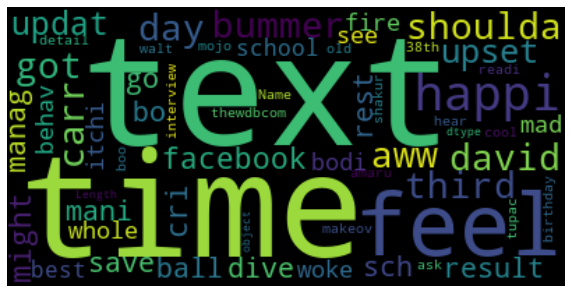

In [33]:
plt.figure(figsize=(10, 10))
plt.imshow(wordclouds, interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
negativo=str(df['text'].loc[df['target'] == 0])
positivo=str(df['text'].loc[df['target'] == 1])

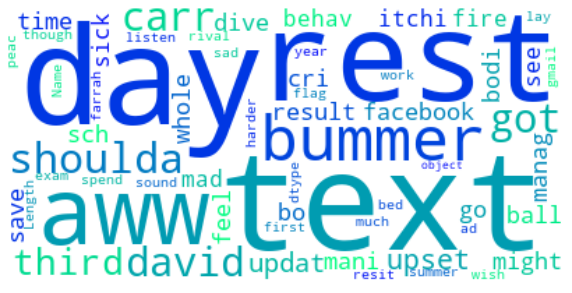

In [66]:
wordclouds = WordCloud(max_words=100, background_color="white",colormap="winter").generate(negativo)
plt.figure(figsize=(10, 10))
plt.imshow(wordclouds, interpolation="bilinear")
plt.axis("off")
plt.show()

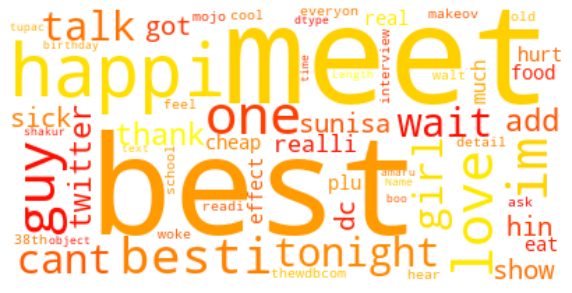

In [73]:
wordclouds = WordCloud( max_words=200, background_color="white",colormap="autumn").generate(positivo)
plt.figure(figsize=(10, 10))
plt.imshow(wordclouds, interpolation="bilinear")
plt.axis("off")
plt.show() 